### Austin Collins
### Feb 21, 2023

# Business Understanding

A regional bank in Texas recently started offering term deposits as a way for their customers to invest their money. Term deposits are time-restricted investments that offer some fixed rate of return over a pre-defined measure of time, ranging anywhere from three months to several years. These kinds of investments are typically attractice to those who are more risk-averse, concerned about movement in the stock market, or want a fixed amount of money coming in every month. Customers at the bank can easily transfer funds from their current accounts to these term deposits, and while there are some limitations on withdrawing money from these term deposit accounts, they offer a higher interest rate than normal checking or savings accounts, so there is an attractive tradeoff for those with extra capital.

This regional bank recently underwent a sales/marketing campaign to encourage current customers to also sign up for term deposits. This was done by contacting customers over the phone to gauge their interest and discuss their options.

Our goal is to take the data from their sales campaign and predict whether or not a customer signed up for term deposits. From there, we can determine feature importances from our model and gauge how best to optimize future sales efforts for term deposits that are highly lucrative for the bank.

As always, we'll start by import the libraries we'll use for our analysis and model building.

In [24]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, plot_roc_curve, plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [25]:
df = pd.read_csv('Data/bank-full.csv')

df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Right away we can see that we have no missing values, which makes our lives much easier. We also have lots of categorical information, which will lend itself nicely to classifiers such as Decision Trees and Random Forests.

Below, we'll explore more about some of the information 

In [27]:
df['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [28]:
df['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [29]:
df['default'].value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [30]:
df['default'] = df['default'].replace({'no':0, 'yes':1}).astype(float)

df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0.0,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,0.0,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,0.0,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,0.0,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,0.0,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0.0,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,0.0,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,0.0,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,0.0,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [31]:
#replace housing and loan columns with numbers and convert to float
df['housing'] = df['housing'].replace({'no':0, 'yes':1}).astype(float)
df['loan'] = df['loan'].replace({'no':0, 'yes':1}).astype(float)

#replace education values with numbers and convert to float
df['education'] = df['education'].replace({'primary':1, 'secondary':2, 'tertiary':3, 'unknown':0}).astype(float)

#assert acccount balance is a float
df['balance'] = df['balance'].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45211 non-null  int64  
 1   job        45211 non-null  object 
 2   marital    45211 non-null  object 
 3   education  45211 non-null  float64
 4   default    45211 non-null  float64
 5   balance    45211 non-null  float64
 6   housing    45211 non-null  float64
 7   loan       45211 non-null  float64
 8   contact    45211 non-null  object 
 9   day        45211 non-null  int64  
 10  month      45211 non-null  object 
 11  duration   45211 non-null  int64  
 12  campaign   45211 non-null  int64  
 13  pdays      45211 non-null  int64  
 14  previous   45211 non-null  int64  
 15  poutcome   45211 non-null  object 
 16  y          45211 non-null  object 
dtypes: float64(5), int64(6), object(6)
memory usage: 5.9+ MB


In [32]:
df['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [33]:
#replace poutcome value 'unknown' with 'other'
df['poutcome'] = df['poutcome'].replace({'unknown':'other'})

#assert floats for other columns
df['day'] = df['day'].astype(float)
df['duration'] = df['duration'].astype(float)
df['campaign'] = df['campaign'].astype(float)
df['pdays'] = df['pdays'].astype(float)
df['previous'] = df['previous'].astype(float)
df['age'] = df['age'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45211 non-null  float64
 1   job        45211 non-null  object 
 2   marital    45211 non-null  object 
 3   education  45211 non-null  float64
 4   default    45211 non-null  float64
 5   balance    45211 non-null  float64
 6   housing    45211 non-null  float64
 7   loan       45211 non-null  float64
 8   contact    45211 non-null  object 
 9   day        45211 non-null  float64
 10  month      45211 non-null  object 
 11  duration   45211 non-null  float64
 12  campaign   45211 non-null  float64
 13  pdays      45211 non-null  float64
 14  previous   45211 non-null  float64
 15  poutcome   45211 non-null  object 
 16  y          45211 non-null  object 
dtypes: float64(11), object(6)
memory usage: 5.9+ MB


In [34]:
df['poutcome'].value_counts()


other      38799
failure     4901
success     1511
Name: poutcome, dtype: int64

In [35]:
#replace previous outcome values with numbers to associate positive or negative outcome
df['poutcome'] = df['poutcome'].replace({'other':0, 'failure':-1, 'success':1}).astype(float)

In [36]:
#rename loan column to be personal loan
df = df.rename(columns={'loan':'personal loan'})

#rename housing column to be housing loan
df = df.rename(columns={'housing':'housing loan'})

#rename default column to be credit in default
df = df.rename(columns={'default':'credit in default'})

#rename contact column to be contact type
df = df.rename(columns={'contact':'contact type'})

#rename marital column to be marital status
df = df.rename(columns={'marital':'marital status'})

#rename education column to be education level
df = df.rename(columns={'education':'education level'})

#rename balance column to be account balance
df = df.rename(columns={'balance':'account balance'})

#rename campaign column to be number of contacts
df = df.rename(columns={'campaign':'number of contacts'})

#rename pdays column to be days since last contact
df = df.rename(columns={'pdays':'days since last contact'})

#rename previous column to be number of contacts before current campaign
df = df.rename(columns={'previous':'number of contacts before current campaign'})

#rename poutcome column to be outcome of previous marketing campaign
df = df.rename(columns={'poutcome':'outcome of previous marketing campaign'})

#rename duration column to be last contact duration in seconds
df = df.rename(columns={'duration':'last contact duration in seconds'})

#rename day column to be last contact day
df = df.rename(columns={'day':'last contact day'})

#rename month column to be last contact month
df = df.rename(columns={'month':'last contact month'})

#rename y column to be subscribed to term deposit
df = df.rename(columns={'y':'subscribed to term deposit'})

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   age                                         45211 non-null  float64
 1   job                                         45211 non-null  object 
 2   marital status                              45211 non-null  object 
 3   education level                             45211 non-null  float64
 4   credit in default                           45211 non-null  float64
 5   account balance                             45211 non-null  float64
 6   housing loan                                45211 non-null  float64
 7   personal loan                               45211 non-null  float64
 8   contact type                                45211 non-null  object 
 9   last contact day                            45211 non-null  float64
 10  last conta

In [38]:
df['marital status'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital status, dtype: int64

In [39]:
df['contact type'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact type, dtype: int64

In [40]:
#transform target variable to be float
df['subscribed to term deposit'] = df['subscribed to term deposit'].replace({'no':0, 'yes':1}).astype(float)

In [41]:
#one hot encode categorical variables
df = pd.get_dummies(df, columns=['job', 'marital status','contact type', 'last contact month'])

In [42]:
df

,age,education level,credit in default,account balance,housing loan,personal loan,last contact day,last contact duration in seconds,number of contacts,days since last contact,...,last contact month_dec,last contact month_feb,last contact month_jan,last contact month_jul,last contact month_jun,last contact month_mar,last contact month_may,last contact month_nov,last contact month_oct,last contact month_sep
0,58.0,3.0,0.0,2143.0,1.0,0.0,5.0,261.0,1.0,-1.0,...,0,0,0,0,0,0,1,0,0,0
1,44.0,2.0,0.0,29.0,1.0,0.0,5.0,151.0,1.0,-1.0,...,0,0,0,0,0,0,1,0,0,0
2,33.0,2.0,0.0,2.0,1.0,1.0,5.0,76.0,1.0,-1.0,...,0,0,0,0,0,0,1,0,0,0
3,47.0,0.0,0.0,1506.0,1.0,0.0,5.0,92.0,1.0,-1.0,...,0,0,0,0,0,0,1,0,0,0
4,33.0,0.0,0.0,1.0,0.0,0.0,5.0,198.0,1.0,-1.0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,3.0,0.0,825.0,0.0,0.0,17.0,977.0,3.0,-1.0,...,0,0,0,0,0,0,0,1,0,0
45207,71.0,1.0,0.0,1729.0,0.0,0.0,17.0,456.0,2.0,-1.0,...,0,0,0,0,0,0,0,1,0,0
45208,72.0,2.0,0.0,5715.0,0.0,0.0,17.0,1127.0,5.0,184.0,...,0,0,0,0,0,0,0,1,0,0
45209,57.0,2.0,0.0,668.0,0.0,0.0,17.0,508.0,4.0,-1.0,...,0,0,0,0,0,0,0,1,0,0


In [43]:
#add minmax scaler to normalize data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [44]:
#display all columns
pd.set_option('display.max_columns', None)
df

,age,education level,credit in default,account balance,housing loan,personal loan,last contact day,last contact duration in seconds,number of contacts,days since last contact,number of contacts before current campaign,outcome of previous marketing campaign,subscribed to term deposit,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital status_divorced,marital status_married,marital status_single,contact type_cellular,contact type_telephone,contact type_unknown,last contact month_apr,last contact month_aug,last contact month_dec,last contact month_feb,last contact month_jan,last contact month_jul,last contact month_jun,last contact month_mar,last contact month_may,last contact month_nov,last contact month_oct,last contact month_sep
0,0.519481,1.000000,0.0,0.092259,1.0,0.0,0.133333,0.053070,0.000000,0.000000,0.000000,0.5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.337662,0.666667,0.0,0.073067,1.0,0.0,0.133333,0.030704,0.000000,0.000000,0.000000,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.194805,0.666667,0.0,0.072822,1.0,1.0,0.133333,0.015453,0.000000,0.000000,0.000000,0.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.376623,0.000000,0.0,0.086476,1.0,0.0,0.133333,0.018707,0.000000,0.000000,0.000000,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.194805,0.000000,0.0,0.072812,0.0,0.0,0.133333,0.040260,0.000000,0.000000,0.000000,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.428571,1.000000,0.0,0.080293,0.0,0.0,0.533333,0.198658,0.032258,0.000000,0.000000,0.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
45207,0.688312,0.333333,0.0,0.088501,0.0,0.0,0.533333,0.092721,0.016129,0.000000,0.000000,0.5,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
45208,0.701299,0.666667,0.0,0.124689,0.0,0.0,0.533333,0.229158,0.064516,0.212156,0.010909,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
45209,0.506494,0.666667,0.0,0.078868,0.0,0.0,0.533333,0.103294,0.048387,0.000000,0.000000,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [45]:
#tree classifier
X = df.drop('subscribed to term deposit', axis=1)
y = df['subscribed to term deposit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree = DecisionTreeClassifier(class_weight='balanced',random_state=42)
tree.fit(X_train, y_train)

tree_scores = cross_val_score(tree, X_train, y_train, cv=5, scoring='accuracy')

tree_scores

array([0.87268455, 0.87669339, 0.87738457, 0.87736762, 0.87598507])

In [46]:
tree_scores.mean()

0.876023039886344

In [47]:
tree_hyperperams = {
    "splitter" : ['best','random'],
    "max_depth" : [3,4,5,6,7],
    "max_features" : ['sqrt','log2']  
}

tree_grid = GridSearchCV(estimator = tree,
                    param_grid = tree_hyperperams,
                    scoring = 'accuracy',
                    cv=5
                   )

In [48]:
tree_grid.fit(X_train, y_train)

tree_grid.best_params_

{'max_depth': 6, 'max_features': 'sqrt', 'splitter': 'best'}

In [49]:
tree_tuned = DecisionTreeClassifier(class_weight='balanced',random_state=42, splitter='random')

tree_tuned.fit(X_train, y_train)

tree_tuned_scores = cross_val_score(tree_tuned, X_train, y_train, cv=5, scoring='accuracy')

tree_tuned_scores

array([0.87945811, 0.87738457, 0.87766105, 0.88248306, 0.88123877])

In [50]:
tree_tuned_scores.mean()

0.8796451125747996

In [51]:
tree_y_pred = tree_tuned.predict(X_test)

0.8751520513104059

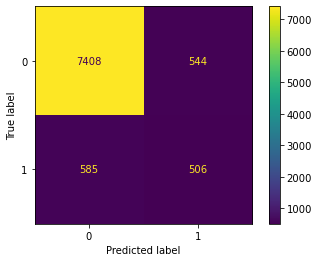

In [52]:
cm = confusion_matrix(y_test, tree_y_pred)
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()


tree_accuracy = accuracy_score(y_test, tree_y_pred)

tree_accuracy

In [53]:
#random forest classifier
forest = RandomForestClassifier(class_weight='balanced',random_state=42)
forest.fit(X_train, y_train)

forest_scores = cross_val_score(forest, X_train, y_train, cv=5, scoring='accuracy')

forest_scores

array([0.90102295, 0.9054465 , 0.90364943, 0.90197705, 0.89990322])

In [54]:
forest_scores.mean()

0.9023998308064967

In [55]:
#random forest hyperparameter tuning

hyperperams = {
    "criterion" : ['gini','entropy'],
    "n_estimators" : [100, 200, 300, 400, 500, 600],
    "max_depth" : [4,5,6,7,8,9,10],
    "max_features" : ['sqrt','log2']
}

grid = RandomizedSearchCV(estimator = forest,
                    param_distributions = hyperperams,
                    scoring = 'accuracy',
                    cv=5
                   )

In [56]:
grid.fit(X_train, y_train)

grid.best_params_

{'n_estimators': 300,
 'max_features': 'log2',
 'max_depth': 9,
 'criterion': 'entropy'}

In [57]:
tuned_forest = RandomForestClassifier(class_weight='balanced',
                                      random_state=42, 
                                      n_estimators=200,
                                      )
                                      
                                      

tuned_forest.fit(X_train, y_train)

tuned_forest_scores = cross_val_score(tuned_forest, X_train, y_train, cv=5, scoring='accuracy')

tuned_forest_scores

array([0.90226707, 0.90392591, 0.90420238, 0.90170054, 0.90239182])

In [58]:
tuned_forest_scores.mean()

0.9028975419506354

In [59]:
forest_y_pred = tuned_forest.predict(X_test)

0.9026871613402632

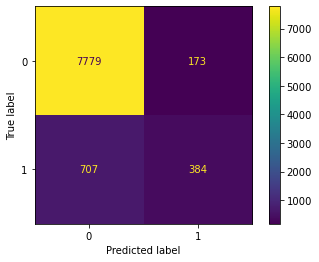

In [60]:
forest_cm = confusion_matrix(y_test, forest_y_pred)
forest_cmd = ConfusionMatrixDisplay(forest_cm)
forest_cmd.plot()

forest_accuracy = accuracy_score(y_test, forest_y_pred)
forest_accuracy

In [61]:
#ada boost classifier
ada = AdaBoostClassifier(random_state=42)
ada.fit(X_train, y_train)

ada_scores = cross_val_score(ada, X_train, y_train, cv=5, scoring='accuracy')

ada_scores


array([0.89964059, 0.90060824, 0.90129942, 0.89948846, 0.90197705])

In [62]:
ada_hyperperams = {
    "n_estimators" : [1,2,5,10],
    "learning_rate" : [1,2,3,4,5], 
}

ada_grid = GridSearchCV(ada, ada_hyperperams, cv=5, scoring='accuracy')

In [63]:
ada_grid.fit(X_train, y_train)

ada_grid.best_params_

{'learning_rate': 1, 'n_estimators': 10}

In [64]:
ada_tuned = AdaBoostClassifier(learning_rate = 1, random_state=42)

ada_tuned.fit(X_train, y_train)

ada_tuned_scores = cross_val_score(ada_tuned, X_train, y_train, cv=5, scoring='accuracy')

ada_tuned_scores

array([0.89964059, 0.90060824, 0.90129942, 0.89948846, 0.90197705])

In [65]:
ada_tuned_scores.mean()

0.9006027499448527

0.8989273471193188

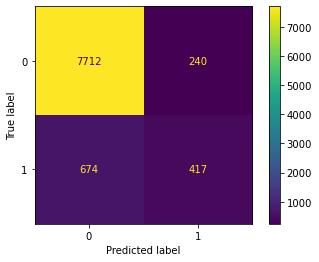

In [66]:
y_pred_ada = ada_tuned.predict(X_test)

cm_ada = confusion_matrix(y_test, y_pred_ada)
cmd_ada = ConfusionMatrixDisplay(cm_ada)
cmd_ada.plot()

ada_accuracy = accuracy_score(y_test, y_pred_ada)
ada_accuracy

In [67]:
tuned_forest.feature_importances_

array([0.07438371, 0.0203691 , 0.00148057, 0.07664588, 0.02883347,
       0.00997697, 0.06512058, 0.34895188, 0.03350767, 0.03604026,
       0.02502066, 0.04282141, 0.00682595, 0.00832854, 0.00307433,
       0.00271017, 0.00800543, 0.00421895, 0.00342401, 0.00534911,
       0.00381269, 0.00813512, 0.0034164 , 0.00098384, 0.00499254,
       0.00873597, 0.00771611, 0.01559046, 0.00478788, 0.02772847,
       0.01229739, 0.00976443, 0.0022911 , 0.00767263, 0.00502645,
       0.00938967, 0.01028185, 0.01214631, 0.0138017 , 0.00851209,
       0.01142877, 0.00639946])

In [68]:
important_features = pd.DataFrame()
scores = tuned_forest.feature_importances_
features = X.columns
important_features['scores'] = pd.Series(scores)
important_features['features'] = pd.Series(features)
important_features.sort_values(by='scores', ascending=False)

,scores,features
7,0.348952,last contact duration in seconds
3,0.076646,account balance
0,0.074384,age
6,0.065121,last contact day
11,0.042821,outcome of previous marketing campaign
9,0.036040,days since last contact
8,0.033508,number of contacts
4,0.028833,housing loan
29,0.027728,contact type_unknown
10,0.025021,number of contacts before current campaign


In [69]:
important_features.to_csv('important_features.csv')

In [ ]:
#find correlation between 'last contact duration' and 'subscribed to term deposit'
df['subscribed to term deposit'].corr(df['last contact duration'])

#find correlation between 'age' and 'subscribed to term deposit'
df['subscribed to term deposit'].corr(df['age'])

#find correlation between account balance and subscribed to term deposit
df['subscribed to term deposit'].corr(df['account balance'])

